In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(x_data))

y = mx + b 

b = 5

m = 0.5

we picked just some random numbers for b,m   and we are going to guess m,b


In [7]:
y_true = (0.5*x_data) + 5 + noise

In [9]:
x_df = pd.DataFrame(data = x_data, columns=['X Data'])

In [22]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [23]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [24]:
y_df.head()

,Y
0,5.087994
1,4.652580
2,6.012312
3,3.857111
4,4.526235


In [29]:
my_data = pd.concat([x_df,y_df],axis=1)

In [30]:
my_data.head()

,X Data,Y
0,0.00000,5.087994
1,0.00001,4.652580
2,0.00002,6.012312
3,0.00003,3.857111
4,0.00004,4.526235


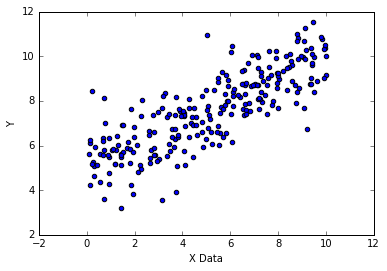

In [34]:
my_data.sample(n=250).plot(kind='scatter', x= 'X Data', y='Y')

In [36]:
batch_size = 8

In [37]:
np.random.randn(2)

array([0.1468386 , 1.59703853])

In [38]:
m = tf.Variable(0.14)
b = tf.Variable(1.59)

In [40]:
xph = tf.placeholder(tf.float32,[batch_size])   # x place holder

In [41]:
yph = tf.placeholder(tf.float32,[batch_size])  # y place holder

In [42]:
y_model = m*xph + b

In [45]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [46]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [47]:
init = tf.global_variables_initializer()

In [65]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = { xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict= feed)
        
    model_m, model_b = sess.run([m,b])    

In [66]:
model_m

0.52692664

In [67]:
model_b

5.132781

In [68]:
y_hat = x_data*model_m + model_b

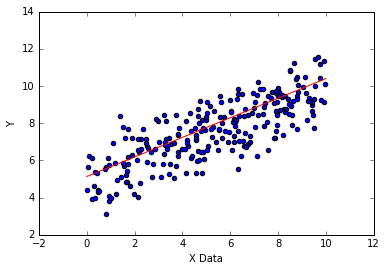

In [69]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat,'r')
